### Import Libraries

In [32]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

### Load DataSet

In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
colnames=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data=pd.read_csv(url,names=colnames)
#Shape of the Data
print("Shape:", data.shape ,"\n")

#First few rows in data
print("First few rows: \n", data.head() ,"\n")

#Class Distribution
print(data.groupby('class').size())


Shape: (150, 5) 

First few rows: 
    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [3]:
print(data.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Box and Whisker Plot

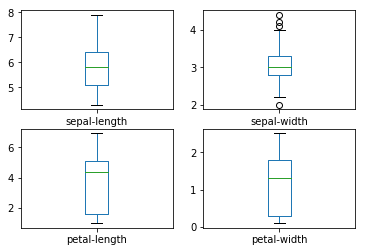

In [4]:
data.plot(kind='Box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

### Histogram

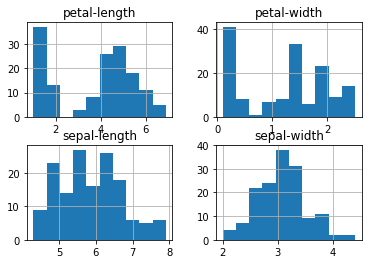

In [5]:
data.hist()
plt.show()

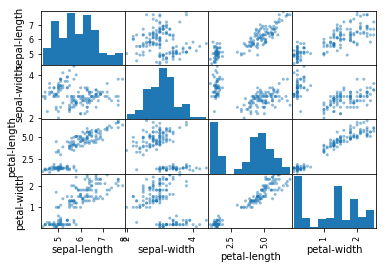

In [6]:
scatter_matrix(data)
plt.show()

### Splitting the Data in to Train and Validation Set

In [7]:
data_values=data.values
X=data_values[:,0:4]
Y=data_values[:,4]
validation_size=.20
seed=7
X_train,X_val,Y_train,Y_val=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [8]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

### Test each model using Cross Validation

In [9]:
seed=7
scoring = 'accuracy'
results = []
names =[]
#Applying all the models to Training set
print("Model Accuracy Sdev")
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f  %f"% (name, cv_results.mean(), cv_results.std()))

Model Accuracy Sdev
LR: 0.966667  0.040825
LDA: 0.975000  0.038188
KNN: 0.983333  0.033333
DT: 0.983333  0.033333
RF: 0.966667  0.040825
NB: 0.975000  0.053359
SVM: 0.991667  0.025000


### Predictions on Validation set

In [10]:
#K Nearest Neighbours
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_val)
print("Accuracy :" , accuracy_score(Y_val,pred))
print("Confusion Matrix :\n",confusion_matrix(Y_val,pred))
print("Classification Report: \n",classification_report(Y_val,pred))

Accuracy : 0.9
Confusion Matrix :
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [11]:
#Support Vector Machine
svm=SVC()
svm.fit(X_train,Y_train)
pred=svm.predict(X_val)
print("Accuracy :" , accuracy_score(Y_val,pred))
print("Confusion Matrix :\n",confusion_matrix(Y_val,pred))
print("Classification Report: \n",classification_report(Y_val,pred))

Accuracy : 0.9333333333333333
Confusion Matrix :
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



### IMPROVEMENTS

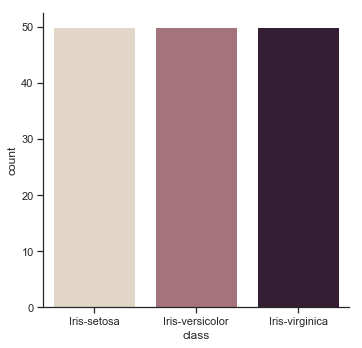

In [23]:
#Graphical way of showing the class distribution
sns.catplot(x="class", kind="count", palette="ch:.25", data=data);

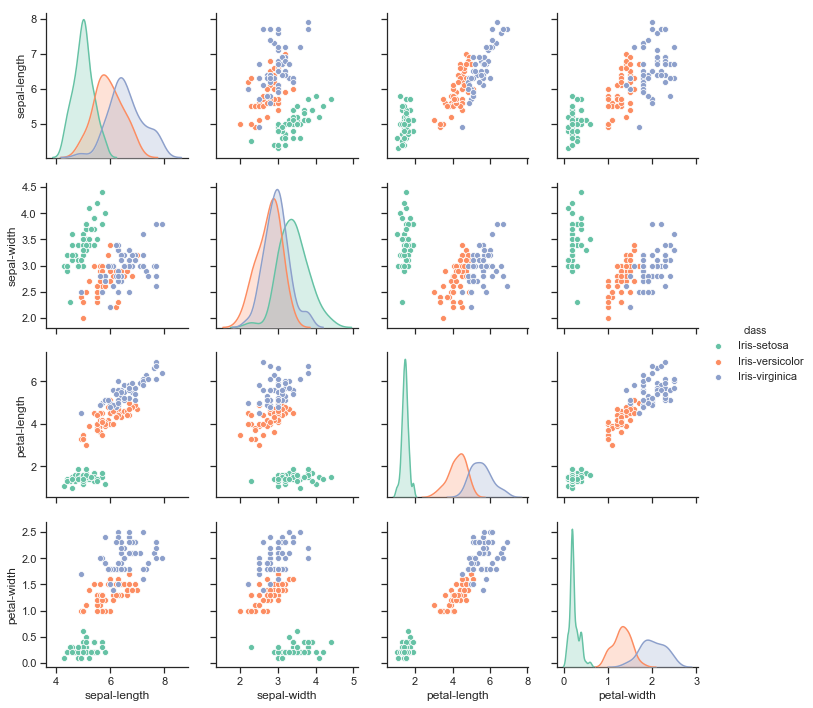

In [31]:
##Colorful way of representing the Scatter Matrix
sns.pairplot(data=data, hue='class', palette='Set2')

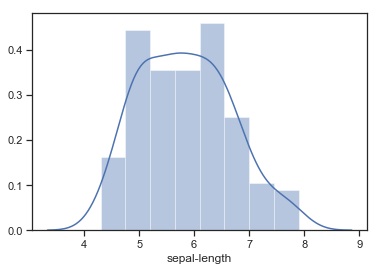

In [25]:
#Distribution of Sepal Length. Almost Normally distributed
sns.distplot(data['sepal-length'])

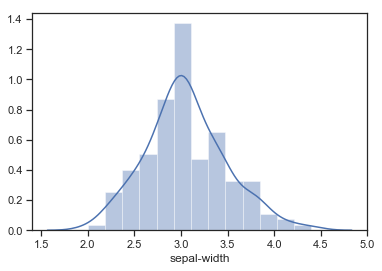

In [26]:
#Distribution of Sepal width. More samples around the mean
sns.distplot(data['sepal-width'])

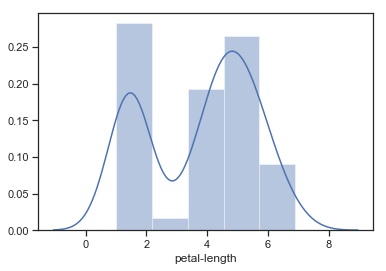

In [27]:
#Distribution of Petal length. Kind of Bi modal distribution
sns.distplot(data['petal-length'])

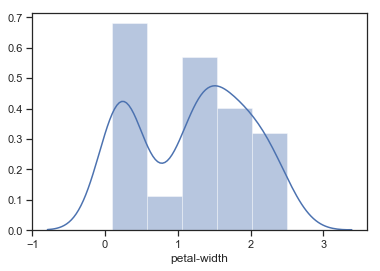

In [28]:
#Distribution of Petal width. Similar to petal-length - Bi modal distribution
sns.distplot(data['petal-width'])

In [12]:
#Statistics of Iris-setosa flowers
setosa=data[data['class']=='Iris-setosa']
setosa.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


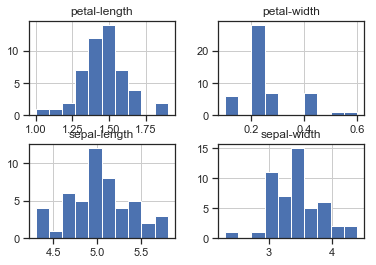

In [20]:
setosa.hist()
plt.show()

In [13]:
#Statistics of Iris-versicolor flowers
versicolor=data[data['class']=='Iris-versicolor']
versicolor.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


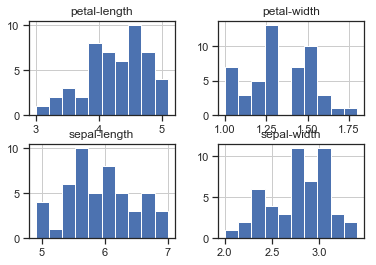

In [21]:
versicolor.hist()
plt.show()

In [14]:
#Statistics of Iris-virginica flowers
virginica =data[data['class']=='Iris-virginica']
virginica.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


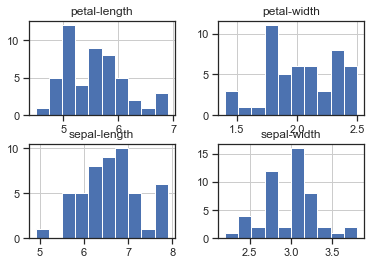

In [22]:
virginica.hist()
plt.show()

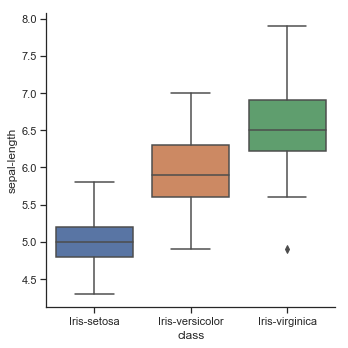

In [16]:
#Plot showing the distribution of Sepal Length of all flowers using Box plot
sns.catplot(x="class", y="sepal-length", kind="box", data=data);

###### Mean sepal length of Setosa flowers is the least. 

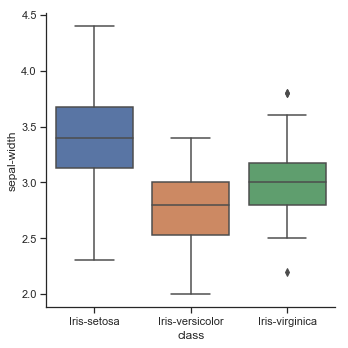

In [17]:
#Plot showing the distribution of Sepal width of all flowers using Box plot
sns.catplot(x="class", y="sepal-width", kind="box", data=data);

##### Mean sepal width of setosa is highest

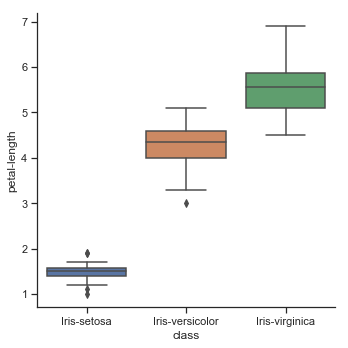

In [18]:
sns.catplot(x="class", y="petal-length", kind="box", data=data);

##### Setosa flowers have very  low petal length

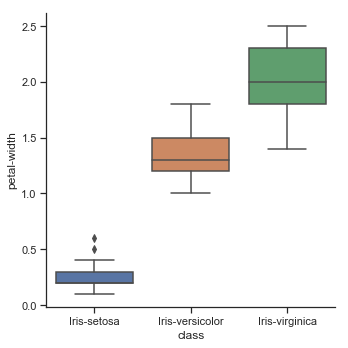

In [19]:
sns.catplot(x="class", y="petal-width", kind="box", data=data);

##### Setosa flowers has the lowest peal width